In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
# Config variables
# Data images are not of the same size
INPUT_SIZE = [128, 128]
BATCH = 32

In [3]:
# No data augmentation
train_val_image_data_generator = ImageDataGenerator(rescale=1.0/255,
                                            rotation_range=20,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode="nearest",
                                            validation_split=0.2
                                            )

train_data = train_val_image_data_generator.flow_from_directory('./data/',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     subset='training',
                                                     shuffle=True,
                                                     classes=['with_mask','without_mask']
                                                     )
validate_data = train_val_image_data_generator.flow_from_directory('./data/',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     subset='validation',
                                                     shuffle=True,
                                                     classes=['with_mask','without_mask']
                                                     )

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [4]:
vgg16_modified = Sequential()
vgg16_modified.add(Conv2D(input_shape=INPUT_SIZE + [3], filters=64, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16_modified.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16_modified.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16_modified.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16_modified.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_modified.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16_modified.add(Flatten())
vgg16_modified.add(Dense(units=500,activation="relu"))
vgg16_modified.add(Dense(units=100,activation="relu"))
vgg16_modified.add(Dense(units=2, activation="softmax"))
vgg16_modified.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       2

In [5]:

vgg16_modified.compile(
  loss='binary_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

In [6]:
es = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='auto')

vgg16_modified_r = vgg16_modified.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es]
)

Epoch 1/25


: 

: 

In [ ]:
vgg16_modified.save('./vgg16/vgg16_modified.h5')

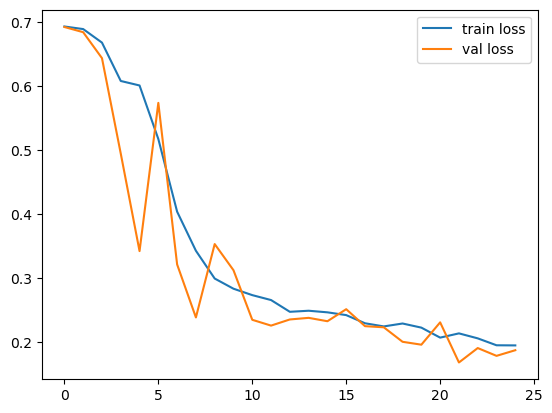

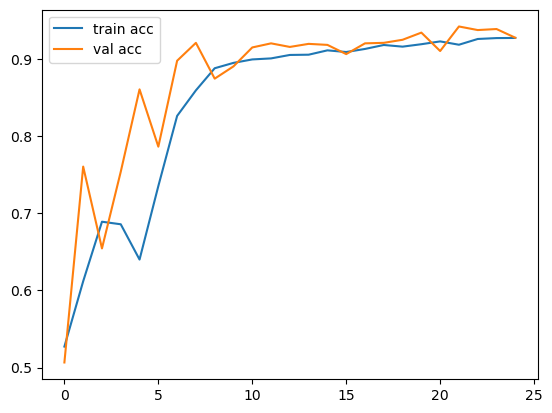

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(vgg16_modified_r.history['loss'], label='train loss')
plt.plot(vgg16_modified_r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('./vgg16/vgg16_modified_LossVal_loss.png')

# plot the accuracy
plt.plot(vgg16_modified_r.history['accuracy'], label='train acc')
plt.plot(vgg16_modified_r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('./vgg16/vgg16_modified_AccVal_acc.png')

In [ ]:
test_image = image.load_img('./data/without_mask/without_mask_3825.jpg', target_size = INPUT_SIZE)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = vgg16_modified.predict(test_image)
if result[0][0] < 0.5:
    print('Image classified as With mask')
else:
    print('Image classified as Without mask')

Image classified as Without mask
